<a href="https://colab.research.google.com/github/Preritp2/Supervised-ML---Regression-NYC-Taxi-Trip-Time-Prediction-/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/NYC Taxi Trip Time Prediction - Prerit Tyagi/Copy of NYC Taxi Data.csv'
df = pd.read_csv(file_path)

In [ ]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(dataFrame):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = dataFrame.memory_usage().sum() / 1024**2
    
    for col in dataFrame.columns:
        col_type = dataFrame[col].dtype
        
        if col_type != object:
            c_min = dataFrame[col].min()
            c_max = dataFrame[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    dataFrame[col] = dataFrame[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    dataFrame[col] = dataFrame[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    dataFrame[col] = dataFrame[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    dataFrame[col] = dataFrame[col].astype(np.int64)
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    dataFrame[col] = dataFrame[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    dataFrame[col] = dataFrame[col].astype(np.float32)
                else:
                    dataFrame[col] = dataFrame[col].astype(np.float64)
        #else:
            #dataFrame[col] = dataFrame[col].astype('category')

    end_mem = dataFrame.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return dataFrame

In [ ]:
dataFrame = pd.read_csv(file_path)
dataFrame = reduce_mem_usage(dataFrame)

Memory usage of dataframe is 122.41 MB --> 75.12 MB (Decreased by 38.6%)


In [ ]:
df.shape

(1458644, 11)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
dataFrame.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [ ]:
dataFrame.duplicated().sum()

0

In [ ]:
dataFrame.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

So, our dataset looks like a clean one with no na values and 1458644 trip records, column `trip_duration` is our target variable. Lets explore the datatype and distribution a more...


In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int8   
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int8   
 5   pickup_longitude    1458644 non-null  float32
 6   pickup_latitude     1458644 non-null  float32
 7   dropoff_longitude   1458644 non-null  float32
 8   dropoff_latitude    1458644 non-null  float32
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int32  
dtypes: float32(4), int32(1), int8(2), object(4)
memory usage: 75.1+ MB


Observation till now,

1.   `id` and `vendor_id` should not be a part of our analysis
2.   `pickup_datetime` and `dropoff_datetime` should be converted to datetime 
3.    `store_and_fwd_flag` is categorical


In [ ]:
dataFrame.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000
mean,1.53495,1.66453,-73.97350,40.75092,-73.97342,40.75180,959.49227
std,0.49878,1.31424,0.07090,0.03288,0.07064,0.03589,5237.43172
min,1.00000,0.00000,-121.93334,34.35970,-121.93330,32.18114,1.00000
25%,1.00000,1.00000,-73.99187,40.73735,-73.99133,40.73588,397.00000
50%,2.00000,1.00000,-73.98174,40.75410,-73.97975,40.75452,662.00000
75%,2.00000,2.00000,-73.96733,40.76836,-73.96301,40.76981,1075.00000
max,2.00000,9.00000,-61.33553,51.88108,-61.33553,43.92103,3526282.00000


We can notice that, max trip duration is 3526282 or ~979 hrs, we have to look into this later. Passenger count normally vary between 2 to 9. The locations are a chunk, which means there is obviously some long trip, but most looks like within short distance between close neighbourhoods

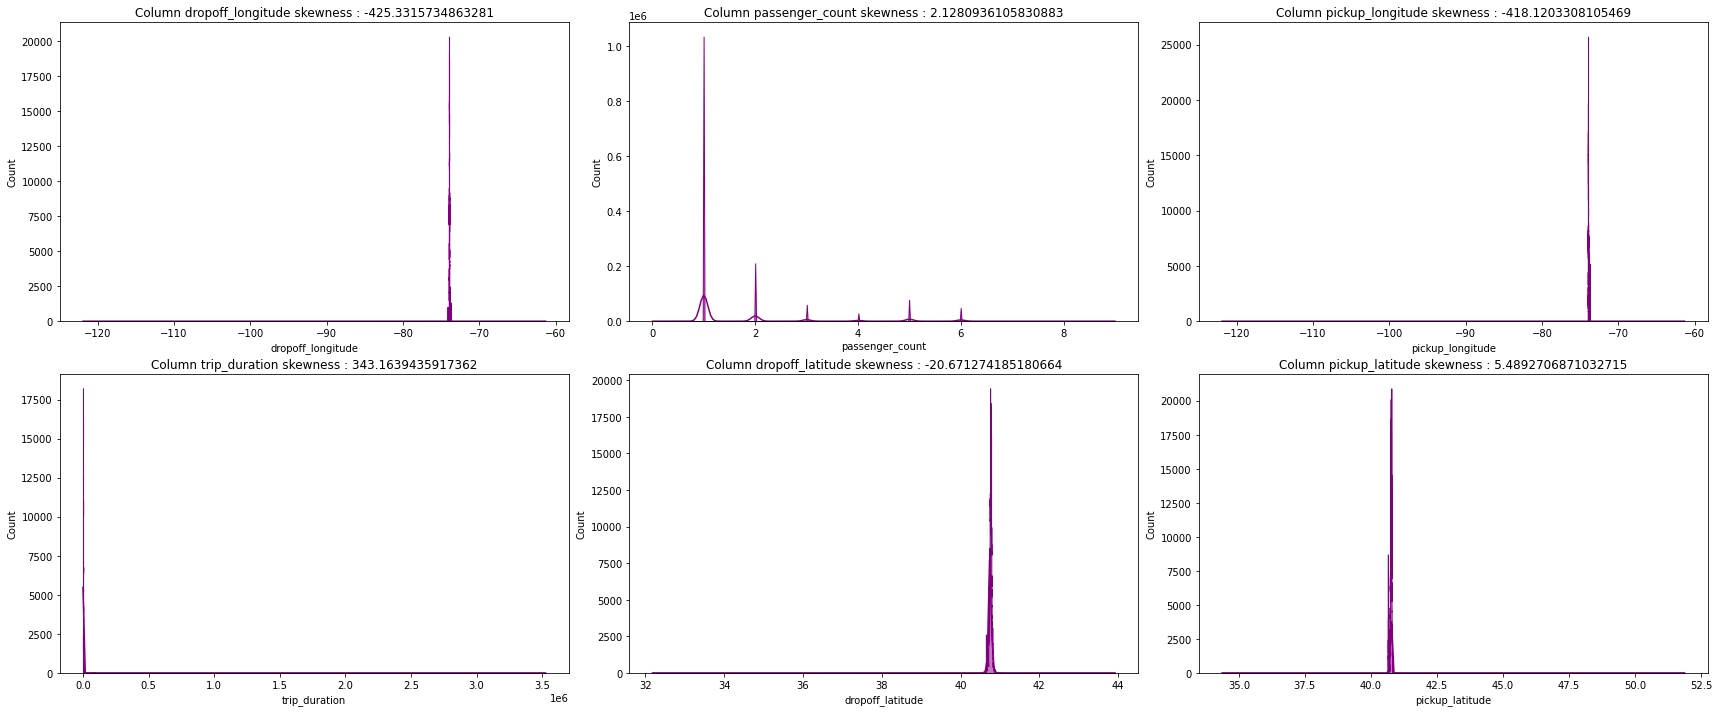

In [ ]:
column_after_excluding = set(dataFrame.columns) - {'vendor_id'}
dist_column_list = dataFrame[column_after_excluding].describe().columns.tolist()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10))
axes = axes.flatten()
for col, ax in zip(dist_column_list, axes):
    sns.histplot(x=col, data=dataFrame, color='purple',ax=ax, kde=True, element='poly')
    ax.set_title(f'Column {col} skewness : {dataFrame[col].skew()}')

plt.tight_layout(h_pad=0.5, w_pad=0.8)

Hmm, so it looks like some of records have very long trip duration, having a such long trip on histogram, it has taken over all the other short trips. So, we should plot the same on log scale rather than normal scale (right skewed data should be transformed into log scale). We will do tha univariate analysis on target later


Now, we will plot lat long but as we've seen previously data is concentrated wiithin a small region in terms of lat long. To plot efficiently, we've to choose a range.

In [ ]:
print(f"The avg range for 1st and 3rd quantile of latitude in case of both pickup and dropoff is \
from {np.mean([dataFrame['pickup_latitude'].quantile(0.25), dataFrame['dropoff_latitude'].quantile(0.25)])} \
to {np.mean([dataFrame['pickup_latitude'].quantile(0.75), dataFrame['dropoff_latitude'].quantile(0.75)])}")

print(f"The avg range for 1st and 3rd quantile of longitude in case of both pickup and dropoff is \
from {np.mean([dataFrame['pickup_longitude'].quantile(0.25), dataFrame['dropoff_longitude'].quantile(0.25)])} \
to {np.mean([dataFrame['pickup_longitude'].quantile(0.75), dataFrame['dropoff_longitude'].quantile(0.75)])}")

The avg range for 1st and 3rd quantile of latitude in case of both pickup and dropoff is from 40.7366156578064 to 40.76908493041992
The avg range for 1st and 3rd quantile of longitude in case of both pickup and dropoff is from -73.99159622192383 to -73.96517181396484


So we'll be considering ±0.10 to both limits for plotting

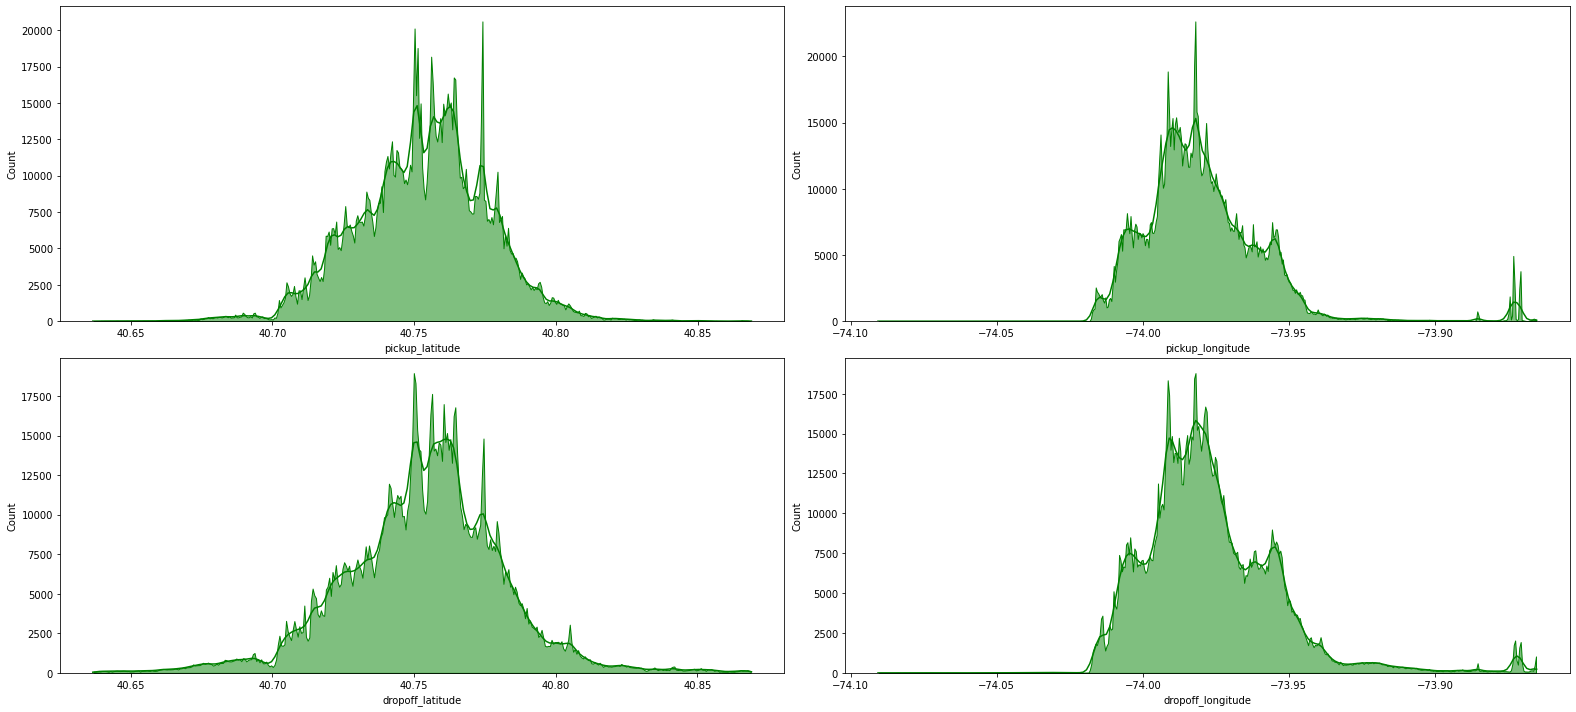

In [ ]:
lat_limits = [40.7366156578064-0.10, 40.76908493041992+0.10]
long_limits = [-73.99159622192383-0.10, -73.96517181396484+0.10]

temp_dataFrame = dataFrame.copy()
temp_dataFrame = temp_dataFrame.loc[(temp_dataFrame.pickup_latitude > lat_limits[0]) & (temp_dataFrame.pickup_latitude < lat_limits[1])]
temp_dataFrame = temp_dataFrame.loc[(temp_dataFrame.dropoff_latitude > lat_limits[0]) & (temp_dataFrame.dropoff_latitude < lat_limits[1])]
temp_dataFrame = temp_dataFrame.loc[(temp_dataFrame.dropoff_longitude > long_limits[0]) & (temp_dataFrame.dropoff_longitude < long_limits[1])]
temp_dataFrame = temp_dataFrame.loc[(temp_dataFrame.pickup_longitude > long_limits[0]) & (temp_dataFrame.pickup_longitude < long_limits[1])]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(22, 10))
axes = axes.flatten()

for col, ax in zip(['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], axes):
    sns.histplot(x=col, data=temp_dataFrame,color='green' ,ax=ax, kde=True, element='poly')

plt.tight_layout(h_pad=0.5, w_pad=0.8)

We can see that most of the trips are getting concentrated between these lat-long only.

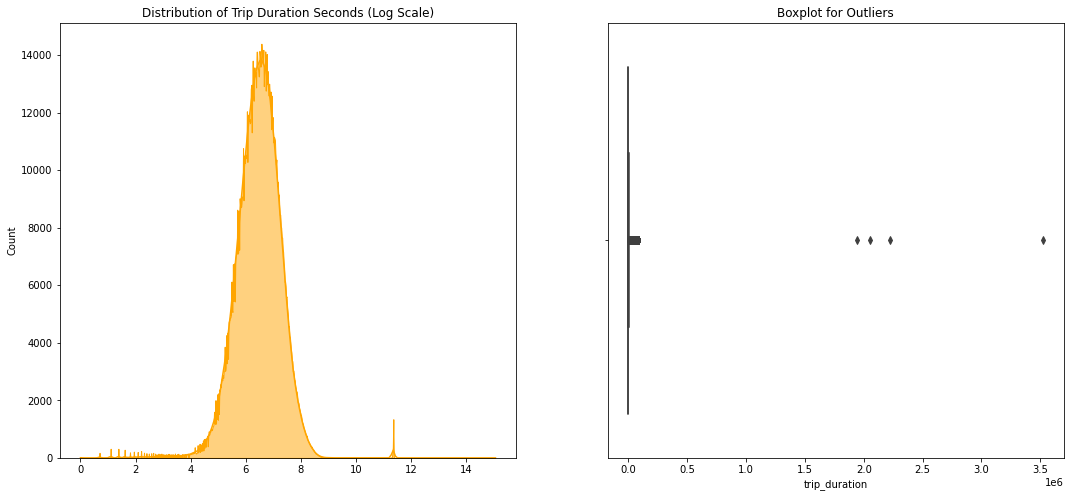

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 8))
axes = axes.flatten()

sns.histplot(x=np.log(dataFrame['trip_duration'].values), ax=axes[0],color='orange',kde=True, element='poly')
axes[0].set_title('Distribution of Trip Duration Seconds (Log Scale)')

sns.boxplot(x='trip_duration', data=dataFrame, ax=axes[1])
axes[1].set_title('Boxplot for Outliers')

plt.show()

So, it looks like a normal distribution on log scale with most of the trips between ~54 sec (exp 4) and 82 mins (exp 8). In previous distribution we've talked about long trips. How much long ? We know the max trip_duration is 3526282.00 seconds or ~979 hours !!!! Is that even possible for an intracity taxi trip ?? There is clearly 4 outliers, we'll review those but first let us calculate trip_distance and add some other later useful features

In [ ]:
from geopy.distance import great_circle

dataFrame['distance_km'] = dataFrame.apply(lambda x: great_circle([x.pickup_latitude, x.pickup_longitude], [x.dropoff_latitude, x.dropoff_longitude]).km, axis=1)

In [ ]:
dataFrame['pickup_datetime'] = pd.to_datetime(dataFrame['pickup_datetime'], format = '%Y-%m-%d %H:%M:%S')
dataFrame['dropoff_datetime'] = pd.to_datetime(dataFrame['dropoff_datetime'], format = '%Y-%m-%d %H:%M:%S')

In [ ]:
dataFrame['pickup_hour'] = dataFrame['pickup_datetime'].dt.hour
dataFrame['pickup_weekday'] = dataFrame['pickup_datetime'].dt.weekday
dataFrame['pickup_day'] = dataFrame['pickup_datetime'].dt.day
dataFrame['pickup_month'] = dataFrame['pickup_datetime'].dt.month
dataFrame['pickup_year'] = dataFrame['pickup_datetime'].dt.year
dataFrame['pickup_date'] = dataFrame['pickup_datetime'].dt.date

dataFrame['dropoff_hour'] = dataFrame['dropoff_datetime'].dt.hour
dataFrame['dropoff_weekday'] = dataFrame['dropoff_datetime'].dt.weekday
dataFrame['dropoff_day'] = dataFrame['dropoff_datetime'].dt.day
dataFrame['dropoff_month'] = dataFrame['dropoff_datetime'].dt.month
dataFrame['dropoff_year'] = dataFrame['dropoff_datetime'].dt.year
dataFrame['dropoff_date'] = dataFrame['dropoff_datetime'].dt.date

In [ ]:
def time_of_day(x):
    # to calculate what time of it is now
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

dataFrame['pickup_time_of_day'] = dataFrame['pickup_hour'].apply(time_of_day)
dataFrame['dropoff_time_of_day'] = dataFrame['dropoff_hour'].apply(time_of_day)

In [ ]:
dataFrame['trip_duration_hour'] = dataFrame['trip_duration'].apply(lambda x: x/3600)

So now, we've created some columns like,

1.   distance_km - total distance travelled using km
2.   pickup/dropoff_hour - range 0 to 23 representing hour in 24-hr format
3.   pickup/dropoff_weekday - range 0 to 6 representing weekday where 0 -> Monday, 6 -> Sunday
4.   pickup/dropoff_day - representing day no of month
5.   pickup/dropoff_month - representing month no of year
6.   pickup/dropoff_year - representing year of travel
7.   pickup/dropoff_date - representing date of travel (yyyy-mm-dd)
8.   pickup/dropoff_time_of_day - categorical column where with 4 unique value, Morning, Afternoon, evening, Late Night
9.   trip_duration_hour - duration of trip in hour

\
Now let us analyze the outliers on target



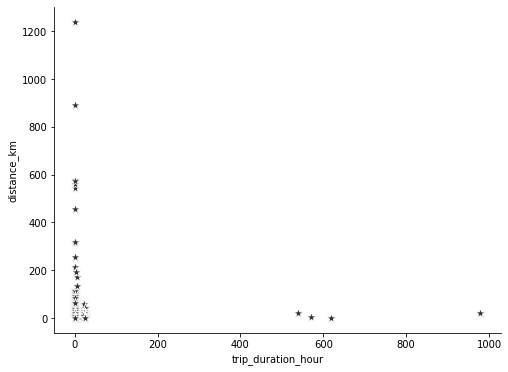

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataFrame, x="trip_duration_hour", y="distance_km", s=100, color=".2", marker="*")
sns.despine()

In [ ]:
filtered_dataFrame = dataFrame[dataFrame['trip_duration_hour'] <= 24]
filtered_dataFrame = filtered_dataFrame.loc[~((dataFrame['trip_duration'] < 100) & (dataFrame['distance_km'] > 10))]

In [ ]:
filtered_dataFrame[filtered_dataFrame['distance_km'] == 0].shape

(5897, 27)

Now, there is 5897 data where distance is 0, maybe location could'nt be tracked, or user cancelled the trip or human/system error. But we will remove these as part of our on the go outlier removal

In [ ]:
filtered_dataFrame = filtered_dataFrame.loc[~(filtered_dataFrame['distance_km'] == 0)]

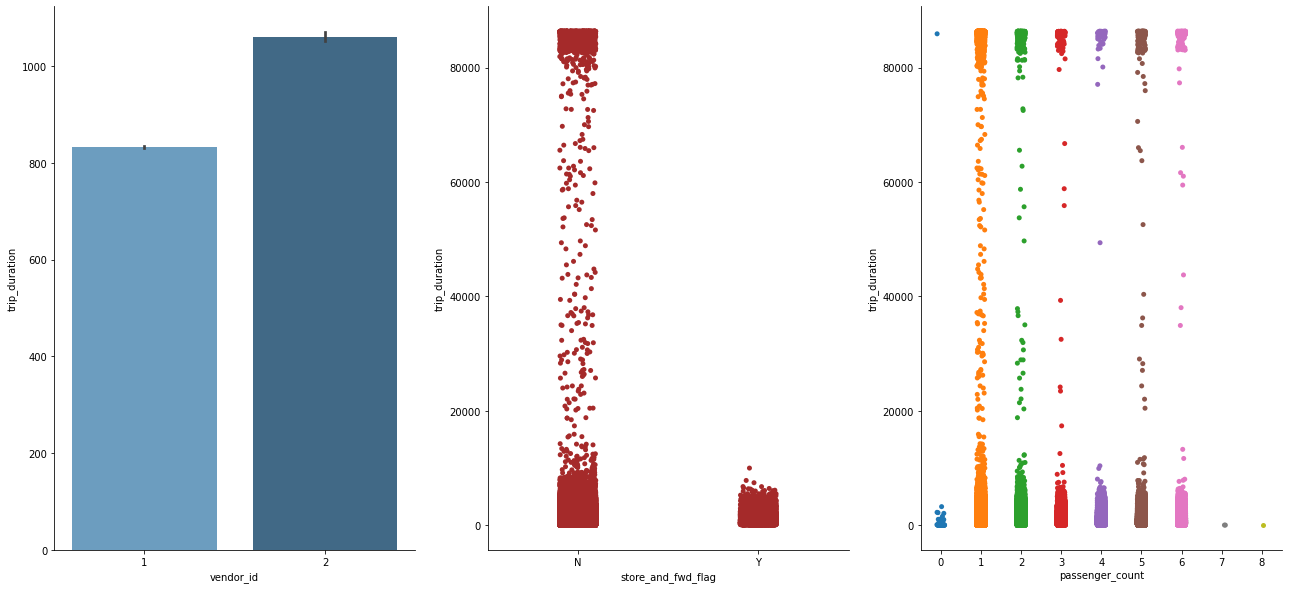

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(22, 10))
ax = axes.flatten()

sns.barplot(data=filtered_dataFrame, x='vendor_id', y='trip_duration', estimator=np.mean, ax=ax[0],palette="Blues_d")
sns.stripplot(data=filtered_dataFrame, y='trip_duration', x='store_and_fwd_flag', ax=ax[1],color='brown')
sns.stripplot(data=filtered_dataFrame, y='trip_duration', x='passenger_count', ax=ax[2])

sns.despine()

It looks like vendor 1 prefer shorter trips over vendor 2. For longer trips, vehicle has connection to the server. For plot in relation with passenger count, there is no important data to capture. Now we will look for the route map of NYC cab service with spatial density plot.

[ ]


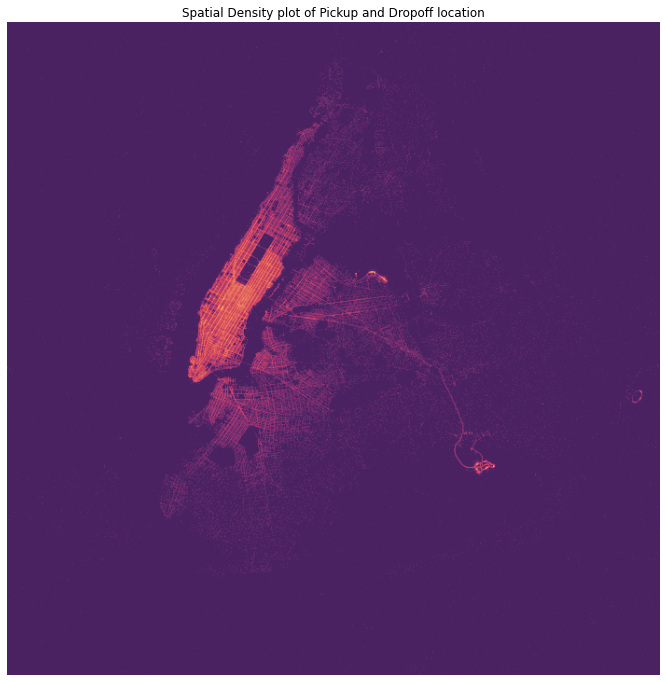

In [ ]:
# idea taken from https://www.kaggle.com/selfishgene/yellow-cabs-tell-the-story-of-new-york-city#Plot-spatial-density-plot-of-the-pickup-and-dropoff-locations
imageSize = (700,700)

latRange = [40.7066156578064-0.20, 40.73908493041992+0.20]
longRange = [-73.96159622192383-0.20, -73.84517181396484+0.20]

allLat  = np.array(list(filtered_dataFrame['pickup_latitude'])  + list(filtered_dataFrame['dropoff_latitude']))
allLong = np.array(list(filtered_dataFrame['pickup_longitude']) + list(filtered_dataFrame['dropoff_longitude']))

allLatInds  = imageSize[0] - (imageSize[0] * (allLat  - latRange[0])  / (latRange[1]  - latRange[0]) ).astype(int)
allLongInds =                (imageSize[1] * (allLong - longRange[0]) / (longRange[1] - longRange[0])).astype(int)

locationDensityImage = np.zeros(imageSize)
for latInd, longInd in zip(allLatInds,allLongInds):
    try:
        locationDensityImage[latInd,longInd] += 1
    except IndexError:
        pass

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,12))
ax.imshow(np.log(locationDensityImage+1),cmap='flare_r')
ax.set_title('Spatial Density plot of Pickup and Dropoff location')
ax.set_axis_off()

Whooaaaa, it really looks like some satellite image, and there is actually some outstation trip

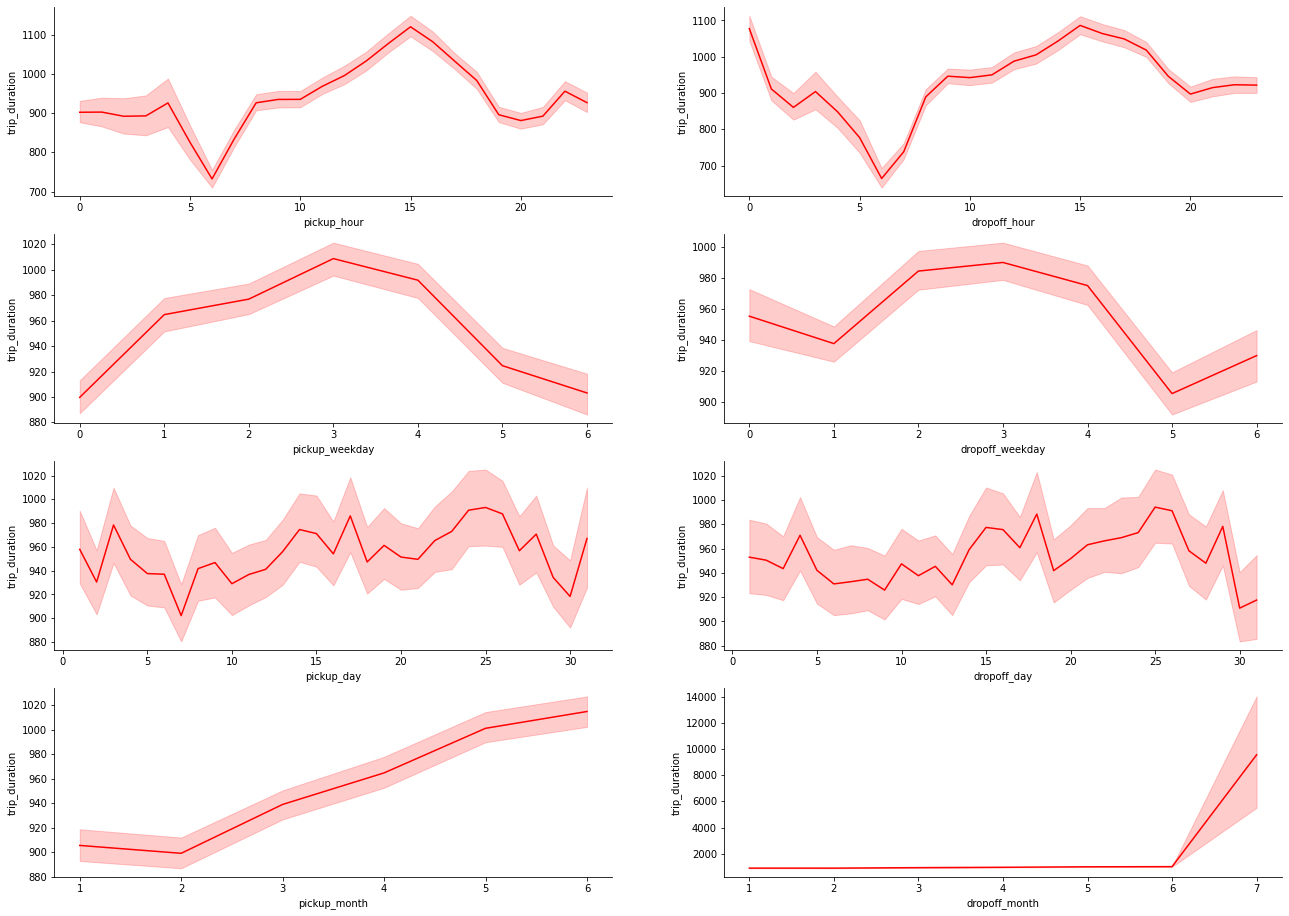

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(22, 16))
ax = axes.flatten()


sns.lineplot(data=filtered_dataFrame, y='trip_duration', x='pickup_hour', ax=ax[0],color="red")
sns.lineplot(data=filtered_dataFrame, y='trip_duration', x='dropoff_hour', ax=ax[1],color="red")

sns.lineplot(data=filtered_dataFrame, y='trip_duration', x='pickup_weekday', ax=ax[2],color="red")
sns.lineplot(data=filtered_dataFrame, y='trip_duration', x='dropoff_weekday', ax=ax[3],color="red")

sns.lineplot(data=filtered_dataFrame, y='trip_duration', x='pickup_day', ax=ax[4],color="red")
sns.lineplot(data=filtered_dataFrame, y='trip_duration', x='dropoff_day', ax=ax[5],color="red")

sns.lineplot(data=filtered_dataFrame, y='trip_duration', x='pickup_month', ax=ax[6],color="red")
sns.lineplot(data=filtered_dataFrame, y='trip_duration', x='dropoff_month', ax=ax[7],color="red")

sns.despine()

As we can notice, Early Morning trip duration is lowest, busiest at mid noon may be because of traffic. Between mid-week trip duration is high than other weekday, normally it lowest on sunday, people use cab mostly for professional purposes. Trip duration started to gradually rise from February, but seriously I didn't understand the graph of trip_duration vs dropoff_month

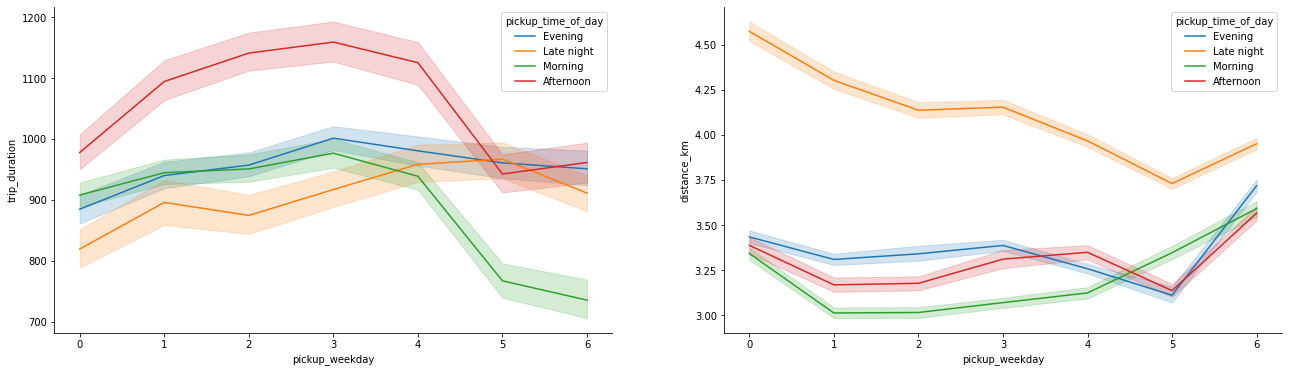

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(22, 6))
ax = axes.flatten()

sns.lineplot(data=filtered_dataFrame, y="trip_duration", x='pickup_weekday', hue='pickup_time_of_day', ax=ax[0])
sns.lineplot(data=filtered_dataFrame, y="distance_km", x='pickup_weekday', hue='pickup_time_of_day', ax=ax[1])
sns.despine()

We can notice that, duration of travel after pickup at afternoon is high, might be roads are busy, office duration ends etc. Similarly though, duration of travel at midnight are somehow low, but the distances are relatively high because traffics are pretty low in midnight



In [ ]:
filtered_dataFrame = pd.concat([filtered_dataFrame, pd.get_dummies(filtered_dataFrame[['store_and_fwd_flag', 'vendor_id']].astype('str'))], axis=1)
try:
    filtered_dataFrame.drop(['store_and_fwd_flag', 'vendor_id'], axis=1, inplace=True)
except KeyError:
    pass

filtered_dataFrame.head()

,id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance_km,...,dropoff_month,dropoff_year,dropoff_date,pickup_time_of_day,dropoff_time_of_day,trip_duration_hour,store_and_fwd_flag_N,store_and_fwd_flag_Y,vendor_id_1,vendor_id_2
0,id2875421,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,1.498523,...,3,2016,2016-03-14,Evening,Evening,0.126389,1,0,0,1
1,id2377394,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,1.805510,...,6,2016,2016-06-12,Late night,Late night,0.184167,1,0,1,0
2,id3858529,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,6.385108,...,1,2016,2016-01-19,Morning,Afternoon,0.590000,1,0,0,1
3,id3504673,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,1.485501,...,4,2016,2016-04-06,Evening,Evening,0.119167,1,0,0,1
4,id2181028,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,1.188590,...,3,2016,2016-03-26,Afternoon,Afternoon,0.120833,1,0,0,1


So we've one hot encoded two columns above, also we will log transform the target variable

In [ ]:
my_custom_dataFrame = filtered_dataFrame.copy()

# now we will log transform after splitting validation set
# my_custom_dataFrame['trip_duration'] = my_custom_dataFrame['trip_duration'].apply(np.log1p)

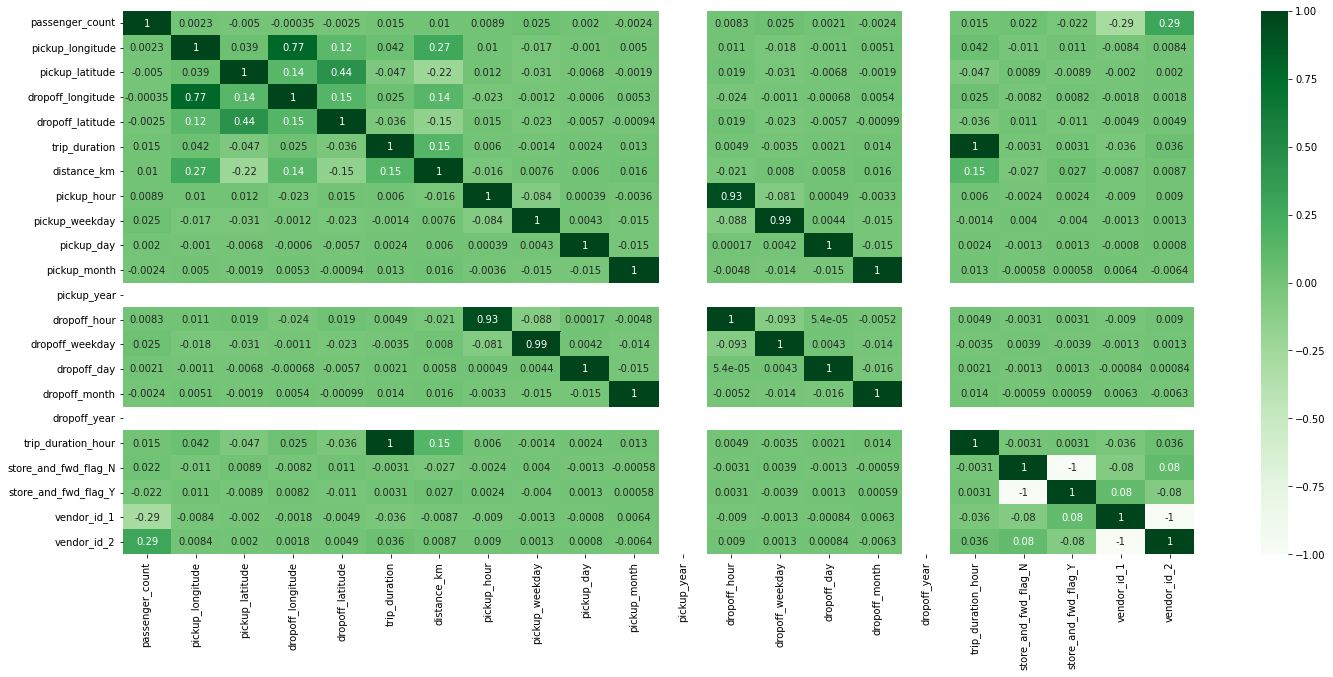

In [ ]:
plt.figure(figsize=(24, 10))
heatmap = sns.heatmap(my_custom_dataFrame.corr(), linewidths=0, vmin=-1, annot=True, cmap="Greens")
plt.show()

Well, our data has only one pickup/dropoff_year i.e. 2016. So, we will drop it. With our target variable trip_duration maximum correlation is with distance i.e. -0.15. We'll keep pickup_hour and drop dropoff_hour due to very high correlation. For the same reason we'll remove pickup_weekday. Will also remove any of encoded features

In [ ]:
# to avoice incase we've rerun it, it won't find the columns and unnecessarily throws error
try:
    my_custom_dataFrame.drop(['dropoff_hour', 'pickup_weekday', 'pickup_year', 'dropoff_year', 'trip_duration_hour', \
                    'pickup_datetime', 'dropoff_datetime', 'pickup_time_of_day', 'dropoff_time_of_day', \
                    'store_and_fwd_flag_N', 'vendor_id_1', 'dropoff_day', 'dropoff_month'], axis=1, inplace=True)
except KeyError:
    pass

In [ ]:
my_custom_dataFrame.columns

Index(['id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'distance_km',
       'pickup_hour', 'pickup_day', 'pickup_month', 'pickup_date',
       'dropoff_weekday', 'dropoff_date', 'store_and_fwd_flag_Y',
       'vendor_id_2'],
      dtype='object')

We still have id & pickup/dropoff_date, which we will remove later after train test split

In [ ]:
X = my_custom_dataFrame.drop(["trip_duration"], axis=1)
Y = my_custom_dataFrame['trip_duration']

X.shape, Y.shape

((1452741, 15), (1452741,))

In [ ]:
from sklearn.model_selection import train_test_split

# dividing into train and test and validation set
X_Train, X_val, y_Train, y_val = train_test_split(X, Y, train_size=0.95, random_state=42)

# log transforming train_test_target
X_train, X_test, y_train, y_test = train_test_split(X_Train, np.log(y_Train.values + 1), train_size=0.75, random_state=42)

print(f"Shape of X_train, X_test, X_val, y_train, y_test, y_val = {X_train.shape}, {X_test.shape}, {X_val.shape}, {y_train.shape}, {y_test.shape}, {y_val.shape}")

Shape of X_train, X_test, X_val, y_train, y_test, y_val = (1035077, 15), (345026, 15), (72638, 15), (1035077,), (345026,), (72638,)


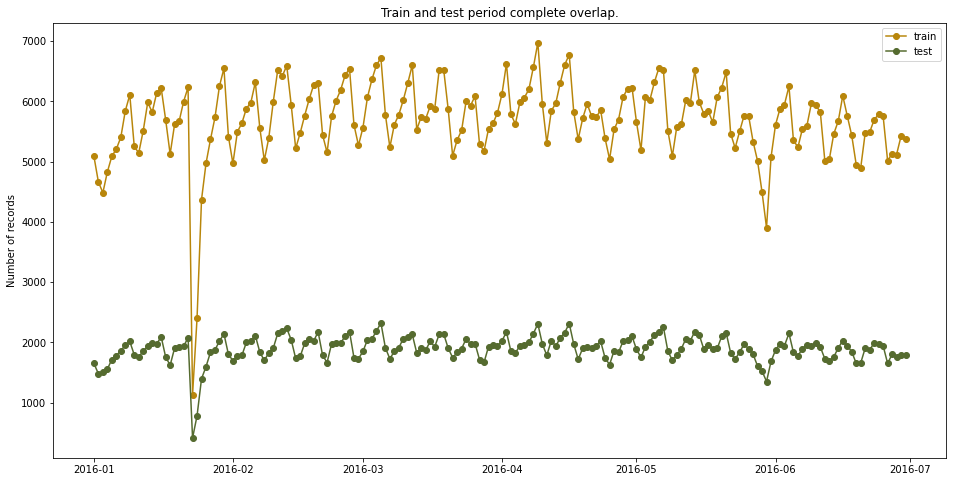

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(X_train.groupby('pickup_date').count()[['id']], 'o-', label='train',color='darkgoldenrod')
plt.plot(X_test.groupby('pickup_date').count()[['id']], 'o-', label='test',color='darkolivegreen')
plt.title('Train and test period complete overlap.')
plt.legend(loc=0)
plt.ylabel('Number of records')
plt.show()

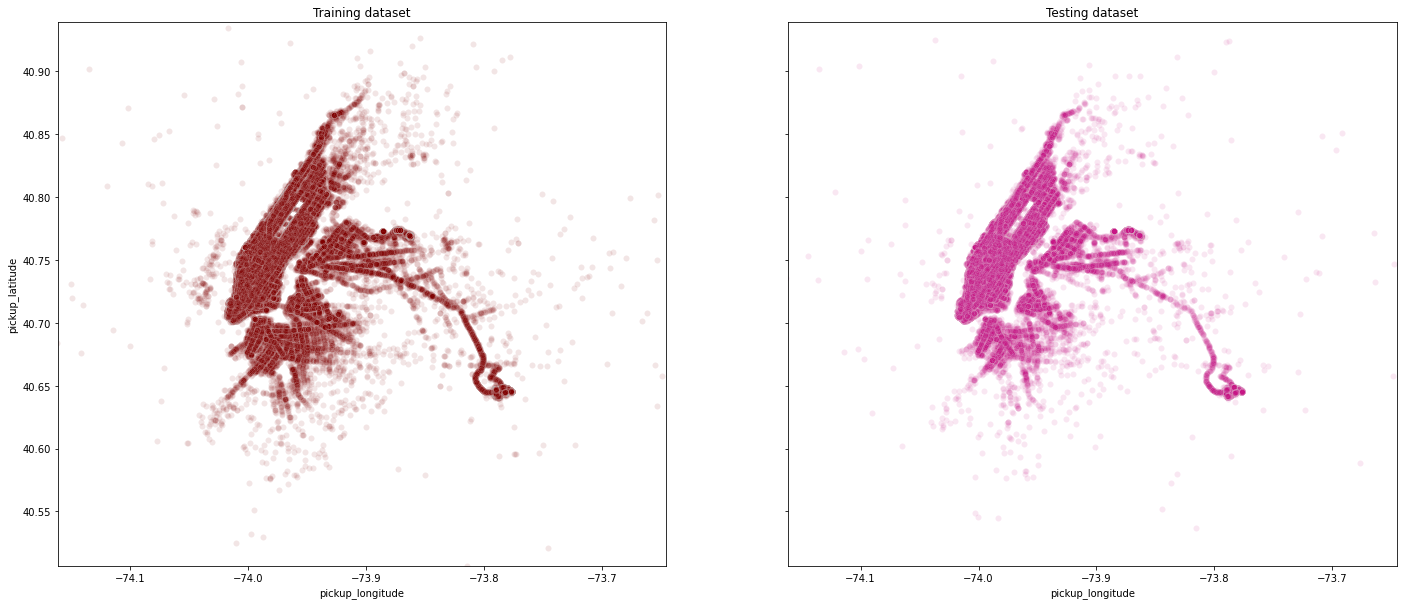

In [ ]:
latRange = [40.7066156578064-0.20, 40.73908493041992+0.20]
longRange = [-73.96159622192383-0.20, -73.84517181396484+0.20]

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(24, 10))
ax = axes.flatten()

sns.scatterplot(data=X_train, x='pickup_longitude', y='pickup_latitude', color='maroon', alpha=0.1, ax=ax[0]).set_title('Training dataset')
sns.scatterplot(data=X_test, x='pickup_longitude', y='pickup_latitude', color='mediumvioletred', alpha=0.1, ax=ax[1]).set_title('Testing dataset')

plt.ylim(latRange)
plt.xlim(longRange)

plt.show()

Since train and test result are well splitted according to date, we will now remove the id, pickup/dropoff_date from all train, test dataset. For now, we won't even touch validation dataset, we will remove these columns from validation on the go

In [ ]:
try:
    X_train.drop(['id', 'pickup_date', 'dropoff_date'], axis=1, inplace=True)
    X_test.drop(['id', 'pickup_date', 'dropoff_date'], axis=1, inplace=True)
except KeyError:
    pass

In [ ]:
from sklearn.preprocessing import StandardScaler

# scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# below algorithms are memory consuming, will do those separately
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor

def model_rndsearch(X_train, y_train, X_test, y_test):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 0.01, 0.001],
                'max_iter': [1000, 2000]
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [1, 0.1, 0.01, 0.001]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        # 'random_forest': {
        #     'model': RandomForestRegressor(),
        #     'params': {
        #         'bootstrap': [True],
        #          'max_depth': [50, 60],
        #          'max_features': ['sqrt'],
        #          'min_samples_leaf': [1],
        #          'min_samples_split': [5],
        #          'n_estimators': [600, 800]
        #     }
        # },
        # 'xgb': {
        #     'model': XGBRegressor(),
        #     'params': {
        #         'max_depth':range(3,10,2),
        #         'min_child_weight':range(1,6,2),
        #         'gamma':[i/10.0 for i in range(0,5)],
        #         'subsample':[i/10.0 for i in range(6,10)],
        #         'colsample_bytree':[i/10.0 for i in range(6,10)]
        #     }
        # }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        # creating randomsearch cross validation and fitting with train data
        rs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_jobs=-1, verbose=10)
        rs.fit(X_train, y_train)
        
        # to collect score with test data
        y_pred = rs.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rtwoscore = r2_score(y_test, y_pred)
        adjusted_r2 = 1-(1-rtwoscore)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
        
        scores.append({
            'model': algo_name,
            'best_score_on_train': rs.best_score_,
            'r2_score_on_test': rtwoscore,
            'adjusted_r2_on_test': adjusted_r2,
            'mse_on_test': mse,
            'rmse_on_test': np.sqrt(mse),
            'best_params': rs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score_on_train', 'r2_score_on_test', 'adjusted_r2_on_test', 'mse_on_test', 'rmse_on_test', 'best_params'])

In [ ]:
# should be completed within 5 minutes
model_dataFrame = model_rndsearch(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
model_dataFrame

,model,best_score_on_train,r2_score_on_test,adjusted_r2_on_test,mse_on_test,rmse_on_test,best_params
0,linear_regression,0.343620,0.326096,0.326072,0.416147,0.645095,{}
1,lasso,0.347218,0.323821,0.323797,0.417552,0.646183,"{'max_iter': 1000, 'alpha': 0.01}"
2,ridge,0.343620,0.326096,0.326073,0.416147,0.645095,{'alpha': 1}
3,decision_tree,0.466987,0.474433,0.474415,0.324547,0.569690,"{'splitter': 'best', 'criterion': 'squared_err..."


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# config = {
#     'max_depth': [50, 60, 70],
#     'min_samples_leaf': [5, 10, 15],
#     'min_samples_split': [5, 10, 15],
#     'n_estimators': [10, 50]
# }

# Running RandomizedSearchCV for RandomForestRegressor with 10x2, 20 fit causing
# colab memory to crash everytime. So commented this out
# rs =  RandomizedSearchCV(RandomForestRegressor(), config, cv=2, return_train_score=False, n_jobs=-1, verbose=10)
# rs.fit(X_train, y_train)

# This should be completed within 10 minutes on colab, have seperatedly tested hyperparameters
# in local system, these params somehow performs significantly better, we would still go for lightbgm
# executed within 10 min
randomForest_model = RandomForestRegressor(n_estimators=50, min_samples_leaf=10, min_samples_split=15, max_features='auto', max_depth=50, bootstrap=True)
randomForest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, min_samples_leaf=10, min_samples_split=15,
                      n_estimators=50)

In [ ]:
# adding obtained metrics from random_forest model run in previous cell
y_pred_rf = randomForest_model.predict(X_test)
y_pred_train_rf = randomForest_model.predict(X_train)

mse = mean_squared_error(y_test, y_pred_rf)
rtwoscore = r2_score(y_test, y_pred_rf)
adjusted_r2 = 1-(1-rtwoscore)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

model_dataFrame = model_dataFrame.append({
    'model': 'random_forest',
    'best_score_on_train': r2_score(y_train, y_pred_train_rf), # best_score stands for r2_score obtained on training data
    'r2_score_on_test': rtwoscore,
    'adjusted_r2_on_test': adjusted_r2,
    'mse_on_test': mse,
    'rmse_on_test': np.sqrt(mse),
    # params that we've used in previous cell
    'best_params': "{'bootstrap': True, 'max_features': 'auto', 'max_depth': 50, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 50}"
}, ignore_index=True)

In [ ]:
from lightgbm import LGBMRegressor

# though lightbgm won't eat up memory, but 10x2 fits is
# taking more than 25 minutes
# config = {
#     'max_depth': [20, 50, 75],
#     'num_leaves': [100, 500, 1000],
#     'n_estimators': [100, 500, 1000]
# }

# rs_lgbm =  RandomizedSearchCV(LGBMRegressor(objective='regression'), config, cv=2, return_train_score=False, n_jobs=-1, verbose=10)
# rs_lgbm.fit(X_train, y_train)

# I've run it and found the {'max_depth': 50, 'n_estimators': 1000, 'num_leaves': 500} to be best params
lgbm_model = LGBMRegressor(max_depth=50, n_estimators=1000, num_leaves=500)
lgbm_model.fit(X_train, y_train)

LGBMRegressor(max_depth=50, n_estimators=1000, num_leaves=500)

In [ ]:
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_train_lgbm = lgbm_model.predict(X_train)

mse = mean_squared_error(y_test, y_pred_lgbm)
rtwoscore = r2_score(y_test, y_pred_lgbm)
adjusted_r2 = 1-(1-rtwoscore)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

model_dataFrame = model_dataFrame.append({
    'model': 'lightgbm',
    'best_score_on_train': r2_score(y_train, y_pred_train_lgbm), # best_score stands for r2_score obtained on training data
    'r2_score_on_test': r2_score(y_test, y_pred_lgbm),
    'adjusted_r2_on_test': adjusted_r2,
    'mse_on_test': mse,
    'rmse_on_test': np.sqrt(mse),
    # params that we've used in previous cell
    'best_params': "{'max_depth': 50, 'n_estimators': 1000, 'num_leaves': 500}"
}, ignore_index=True)

In [ ]:
model_dataFrame

model_dataFrame.style.set_properties(subset=['best_params'], **{'width': '420px'})

,model,best_score_on_train,r2_score_on_test,adjusted_r2_on_test,mse_on_test,rmse_on_test,best_params
0,linear_regression,0.343620,0.326096,0.326072,0.416147,0.645095,{}
1,lasso,0.347218,0.323821,0.323797,0.417552,0.646183,"{'max_iter': 1000, 'alpha': 0.01}"
2,ridge,0.343620,0.326096,0.326073,0.416147,0.645095,{'alpha': 1}
3,decision_tree,0.466987,0.474433,0.474415,0.324547,0.569690,"{'splitter': 'best', 'criterion': 'squared_error'}"
4,random_forest,0.830984,0.744237,0.744228,0.157938,0.397414,"{'bootstrap': True, 'max_features': 'auto', 'max_depth': 50, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 50}"
5,lightgbm,0.891685,0.775582,0.775574,0.138582,0.372266,"{'max_depth': 50, 'n_estimators': 1000, 'num_leaves': 500}"


:As we can check lightgbm has performed with a r2_score of 0.775582 on test set. We're going to validate data on our validation set using lgbm_model